### 多目标规划模型——组合投资问题
#### 模型一：固定风险水平，优化收益

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [30]:
x = cp.Variable(5, pos=True)
r = np.array([5, 28, 21, 23, 25])/100
q = np.array([0, 2.5, 1.5, 5.5, 2.6])/100
p = np.array([0, 1, 2, 4.5, 6.5])/100
u = np.array([0, 103, 198, 52, 40])

M = 1e4

In [37]:
obj = cp.Maximize(cp.sum(cp.multiply(r-q,x)))
a = 0.0
aa = []
Q = []
X = []
while a <= 0.05:
    aa.append(a)
    cons = [
        cp.multiply(q, x)/M <= a,
        cp.sum(cp.multiply(1+p, x)) == M
    ]
    prob = cp.Problem(obj, cons)
    prob.solve(solver='GLPK_MI')
    Q.append(prob.value)
    X.append(x.value)
    a += 0.0005

Text(0, 0.5, '$Q$')

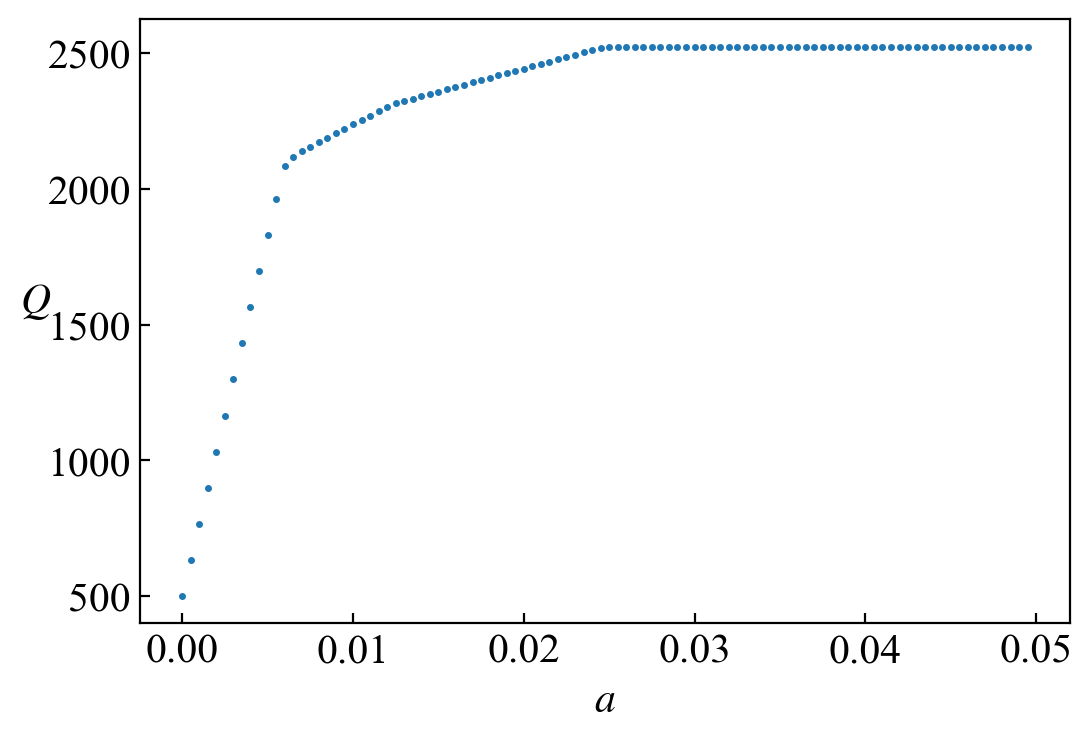

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aa, Q, marker='.', linewidth=0, markersize=3)
ax.set_xlabel('$a$')
ax.set_ylabel('$Q$', rotation=0)